<a href="https://colab.research.google.com/github/Shweta-singh-davv/python-data-science/blob/main/startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
start_up= pd.read_csv("/content/Startups in 2021 end.csv")

In [ ]:
start_up.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
start_up.tail()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"
935,935,Pet Circle,$1,12/7/2021,Australia,Alexandria,E-commerce & direct-to-consumer,"Prysm Capital, Baillie Gifford & Co., TDM Grow..."


In [ ]:
start_up.describe()

,Unnamed: 0
count,936.000000
mean,467.500000
std,270.344225
min,0.000000
25%,233.750000
50%,467.500000
75%,701.250000
max,935.000000


In [ ]:
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        936 non-null    int64 
 1   Company           936 non-null    object
 2   Valuation ($B)    936 non-null    object
 3   Date Joined       936 non-null    object
 4   Country           936 non-null    object
 5   City              921 non-null    object
 6   Industry          936 non-null    object
 7   Select Investors  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
# removing $ sign from valuation and converting the column to integer
# converting date joined column to date type
# converting country, city and industry columns to category type
start_up['Valuation ($B)']= start_up['Valuation ($B)'].str.replace('$','')


<ipython-input-6-0fe51f3d267c>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  start_up['Valuation ($B)']= start_up['Valuation ($B)'].str.replace('$','')


In [ ]:
start_up['Valuation ($B)']= start_up['Valuation ($B)'].astype("float")
start_up['Date Joined']= pd.to_datetime(start_up['Date Joined'])
start_up['Country']=start_up['Country'].astype("category")
start_up['City']= start_up['City'].astype("category")
start_up['Industry']= start_up['Industry'].astype("category")

In [ ]:
start_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        936 non-null    int64         
 1   Company           936 non-null    object        
 2   Valuation ($B)    936 non-null    float64       
 3   Date Joined       936 non-null    datetime64[ns]
 4   Country           936 non-null    category      
 5   City              921 non-null    category      
 6   Industry          936 non-null    category      
 7   Select Investors  935 non-null    object        
dtypes: category(3), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 52.4+ KB


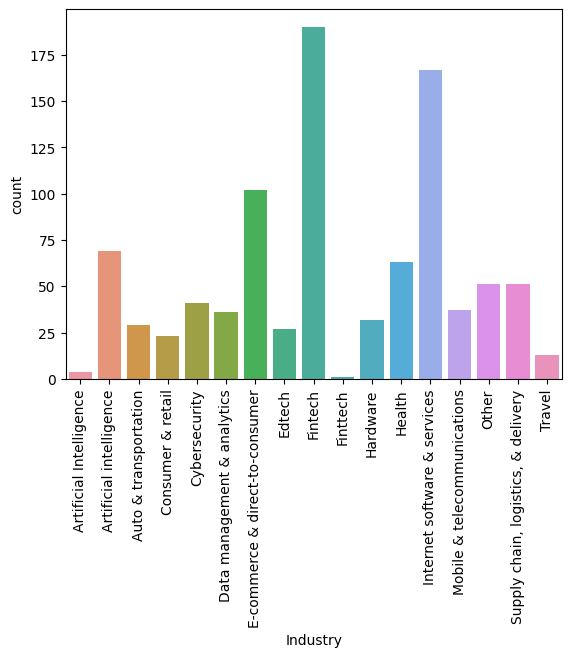

In [ ]:
#lets pose some questions.
# which industry is leading in the startup segment of the economy?
#what is the valuation related to different industry groups?
#which city and country are most preffered by the startups?
# which year have highest and lowest startups joined?

# now lets visualise industry wise pattern of start-ups
sns.countplot(x='Industry', data=start_up )
plt.xticks(rotation=90)# this code is to rotate the x axis labels to 90 degrees
plt.show()
# top industries are fintech, internet software and services and e- commerce
# artificial intelligence and health are alos on the rise

In [ ]:
# grouping valuation with respect to industries
grouped_valuation= start_up.groupby('Industry')


In [ ]:
grouped_valuation.size()

Industry
Artificial Intelligence                  4
Artificial intelligence                 69
Auto & transportation                   29
Consumer & retail                       23
Cybersecurity                           41
Data management & analytics             36
E-commerce & direct-to-consumer        102
Edtech                                  27
Fintech                                190
Finttech                                 1
Hardware                                32
Health                                  63
Internet software & services           167
Mobile & telecommunications             37
Other                                   51
Supply chain, logistics, & delivery     51
Travel                                  13
dtype: int64

In [ ]:
grouped_valuation['Valuation ($B)'].mean().sort_values(ascending=False)
#Fintech industry has highest average valuation

Industry
Finttech                               10.000000
Other                                   4.812941
Artificial intelligence                 4.465797
Fintech                                 3.863842
Data management & analytics             3.380556
Edtech                                  3.161852
Hardware                                3.080938
Auto & transportation                   3.079310
Internet software & services            2.896766
Supply chain, logistics, & delivery     2.868431
E-commerce & direct-to-consumer         2.853922
Consumer & retail                       2.788261
Travel                                  2.738462
Health                                  2.639048
Cybersecurity                           2.622927
Mobile & telecommunications             2.137568
Artificial Intelligence                 1.175000
Name: Valuation ($B), dtype: float64

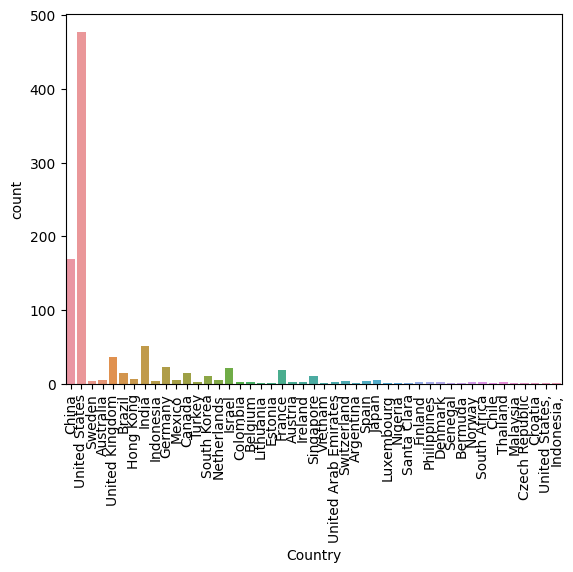

In [7]:
# country with highest number of startups are united states followed by china
sns.countplot(x='Country',data = start_up)
plt.xticks(rotation=90)
plt.show()

In [11]:
#city with highest number of startups
start_up['City'].value_counts()
# top three cities with highest number of start ups are san francisco, new york and beijing

San Francisco    134
New York          81
Beijing           62
Shanghai          45
London            28
                ... 
Leudelange         1
Goleta             1
Lagos              1
United States      1
Alexandria         1
Name: City, Length: 239, dtype: int64